<img src = "./images/scikit-learn.png" alt = "Scikit-Learn" width = 800 />

# Introduction to Scikit Learn
Scikit-Learn package provides efficient versions of a large number of common algorithms. It is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

## Data Representation in Scikit-Learn
Data is represented in a dataframe or a numpy array. For use in Scikit-Learn, we extract the features matrix and target array from the DataFrame, which we can do using some of the Pandas DataFrame operations.


In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
DeepnoteChart(iris, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"species","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"petal_width","aggregate":"sum"},"color":{"sort":null,"type":"nominal","field":"species","scale":{"scheme":"tableau10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

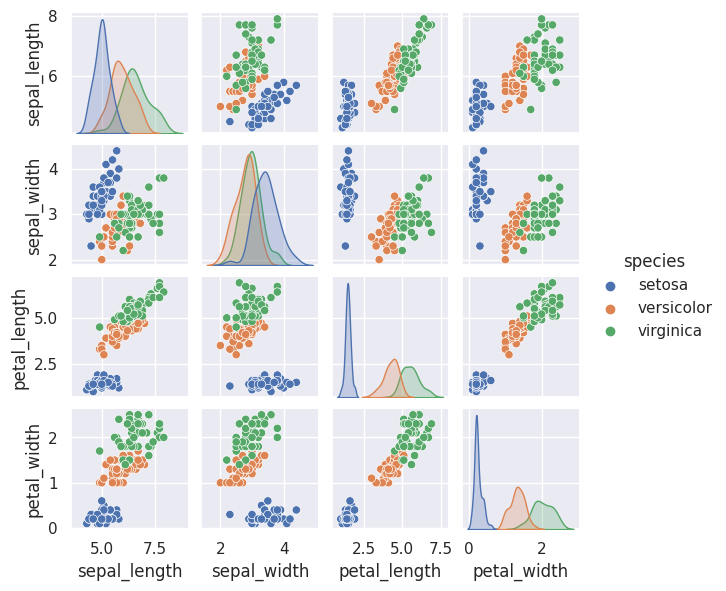

In [4]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [5]:
#Feature Matrix
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
#Target Array
y_iris = iris['species']
y_iris.shape

(150,)

<img src = "./images/features_matrix.png" alt = "Feature Matrix and Target Array" width = 800 />

## Scikit-Learn's Estimator API

The Scikit-Learn API paper provides following guiding principles:

- Consistency: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- Inspection: All specified parameter values are exposed as public attributes.

- Limited object hierarchy: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.

- Composition: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.

- Sensible defaults: When models require user-specified parameters, the library defines an appropriate default value.

Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API
Most commonly, the steps in using the Scikit-Learn estimator API are as follows.

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data

For supervised learning, often we predict labels for unknown data using the predict() method.
For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

## Simple Linear Regression
As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to (x,y) data. We will use the following simple data for our regression example.

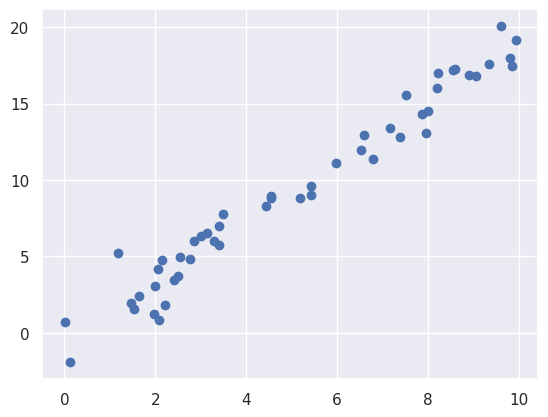

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState()
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [8]:
x.shape

(50,)

### 1. Choose a class of model
In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [9]:
from sklearn.linear_model import LinearRegression

### 2. Choose model hyperparameters
An important point is that a class of model is not the same as an instance of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

a. Would we like to fit for the offset (i.e., y-intercept)?
b. Would we like the model to be normalized?
c. Would we like to preprocess our features to add model flexibility?
d. What degree of regularization would we like to use in our model?
e. How many model components would we like to use?

These are examples of the important choices that must be made once the model class is selected. These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation. We will explore how you can quantitatively motivate the choice of hyperparameters in Hyperparameters and Model Validation.

For our linear regression example, we can instantiate the LinearRegression class and specify that we would like to fit the intercept using the fit_intercept hyperparameter:

In [10]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

### 3. Arrange data into a features matrix and target vector
Here our target variable y is already in the correct form (a length-n_samples array), but we need to massage the data x to make it a matrix of size [n_samples, n_features]. In this case, this amounts to a simple reshaping of the one-dimensional array.

In [11]:
X = x[:, np.newaxis]
X.shape

(50, 1)

### 4. Fit the model to your data
Now it is time to apply our model to data. This can be done with the fit() method of the model

In [12]:
model.fit(X, y)

LinearRegression()

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores; for example in this linear model, we have the following

In [13]:
print(model.coef_)
print(model.intercept_)

[1.96121516]
-0.5759140518840589


 In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a statistical modeling question than a machine learning question. Machine learning rather focuses on what the model predicts. If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the Statsmodels Python package.

 ### 5. Predict labels for unknown data
Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the predict() method. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts.

Further is elaboration on [np.newaxis](https://stackoverflow.com/questions/29241056/how-do-i-use-np-newaxis)

<img src = './images/Vector.png' />

In [14]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
Xfit[:5]

array([[-1.        ],
       [-0.75510204],
       [-0.51020408],
       [-0.26530612],
       [-0.02040816]])

In [15]:
yfit = model.predict(Xfit)
yfit

array([-2.53712921, -2.05683162, -1.57653403, -1.09623644, -0.61593885,
       -0.13564126,  0.34465633,  0.82495392,  1.30525151,  1.7855491 ,
        2.26584669,  2.74614429,  3.22644188,  3.70673947,  4.18703706,
        4.66733465,  5.14763224,  5.62792983,  6.10822742,  6.58852501,
        7.0688226 ,  7.54912019,  8.02941778,  8.50971538,  8.99001297,
        9.47031056,  9.95060815, 10.43090574, 10.91120333, 11.39150092,
       11.87179851, 12.3520961 , 12.83239369, 13.31269128, 13.79298888,
       14.27328647, 14.75358406, 15.23388165, 15.71417924, 16.19447683,
       16.67477442, 17.15507201, 17.6353696 , 18.11566719, 18.59596478,
       19.07626237, 19.55655997, 20.03685756, 20.51715515, 20.99745274])

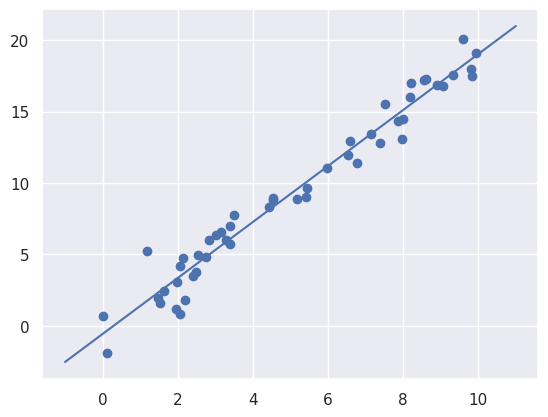

In [16]:
plt.scatter(x, y)
plt.plot(Xfit, yfit);

## Supervised learning: Iris classification

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,train_size=100)

In [18]:
Xtest.shape

(50, 4)

In [19]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.94

<img src = "./images/FeatureEngineering.png" alt = "Feature Engineering" width = 800 />

# Feature Engineering
One of the most important steps in using machine learning in practice is feature engineering. It takes whatever information we have about our problem and turn it into numbers that you can use to build your feature matrix.

## Derived Features
Another useful type of feature is one that is mathematically derived from some input features. We can convert a linear regression into a polynomial regression not by changing the model, but by transforming the input! For example, this data clearly cannot be well described by a straight line. Still, we can fit a line to the data using LinearRegression and get the optimal result. This idea of improving a model not by changing the model, but by transforming the inputs, is fundamental to many of the more powerful machine learning methods. 

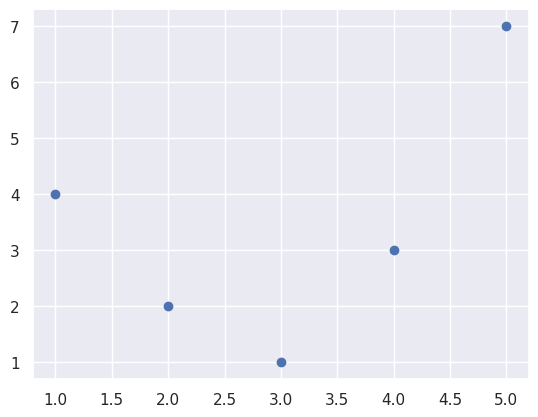

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)

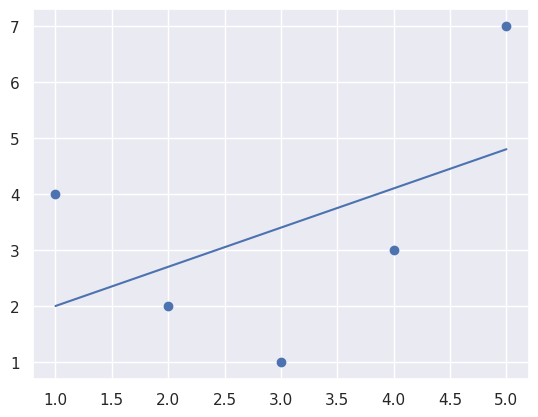

In [22]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

It's clear that we need a more sophisticated model to describe the relationship between $x$ and $y$.

One approach to this is to transform the data, adding extra columns of features to drive more flexibility in the model. For example, we can add polynomial features to the data this way. The derived feature matrix has one column representing $x$, and a second column representing $x^2$, and a third column representing $x^3$. Computing a linear regression on this expanded input gives a much closer fit to our data.

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

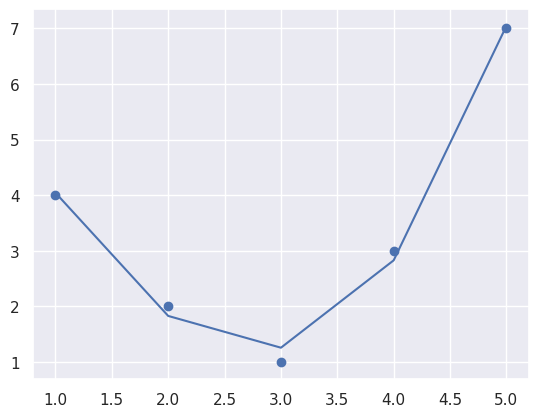

In [24]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

## Missing Data
Another common need in feature engineering is handling of missing data. Often the NaN value is used to mark missing values. For example, we might have a dataset that looks like this

In [25]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
X

array([[nan,  0.,  3.],
       [ 3.,  7.,  9.],
       [ 3.,  5.,  2.],
       [ 4., nan,  6.],
       [ 8.,  8.,  1.]])

In [26]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0396bd3d-5050-4c7c-9066-8077dbb9bdc2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>